In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
omics= pd.read_csv('data/OmicsExpressionProteinCodingGenesTPMLogp1.csv')
mutations= pd.read_csv('data/OmicsSomaticMutations.csv')
models = pd.read_csv('data/Model.csv')

In [18]:
omics.rename(columns={omics.columns[0]: 'ModelID'}, inplace=True)

In [19]:
mutations= mutations[mutations['HugoSymbol'] == 'TP53']
merged_df = pd.merge(omics, mutations[['ModelID','HugoSymbol']], left_on='ModelID', right_on='ModelID', how='left')

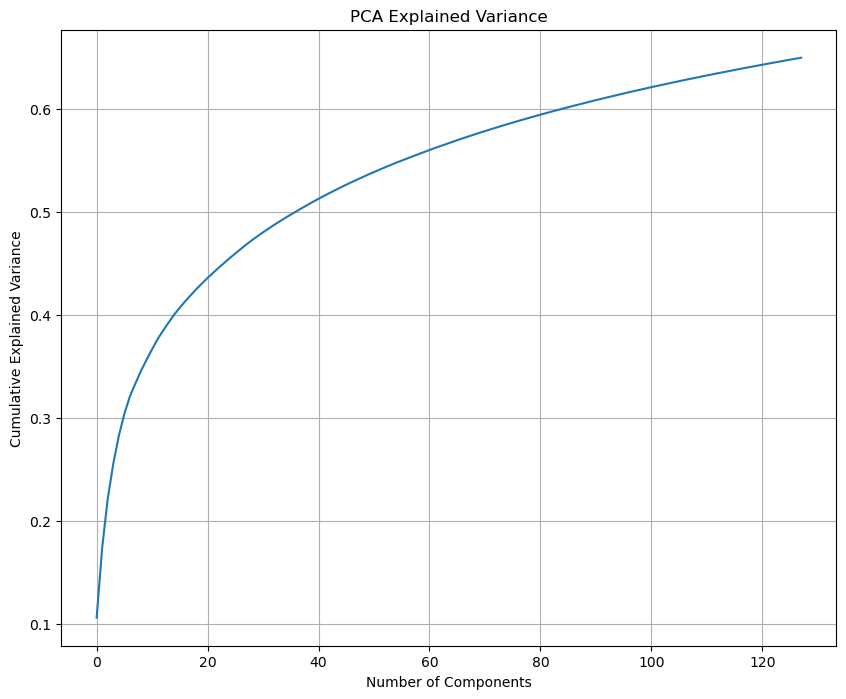

In [20]:
#i want to apply PCA
X= merged_df.iloc[:, 1:-2].values

pca = PCA(n_components=128)
scaler= StandardScaler()
X_s= scaler.fit_transform(X)
y=pca.fit_transform(X_s)
data=pd.DataFrame(data=y, columns=[f'PC{i+1}' for i in range(128)])
# Add the PCA results to the merged DataFrame

#plotting
plt.figure(figsize=(10, 8))
#i have 128 pca components to plot i want to plot the variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()





              precision    recall  f1-score   support

           0       0.84      0.67      0.75       118
           1       0.85      0.94      0.89       241

    accuracy                           0.85       359
   macro avg       0.85      0.80      0.82       359
weighted avg       0.85      0.85      0.84       359



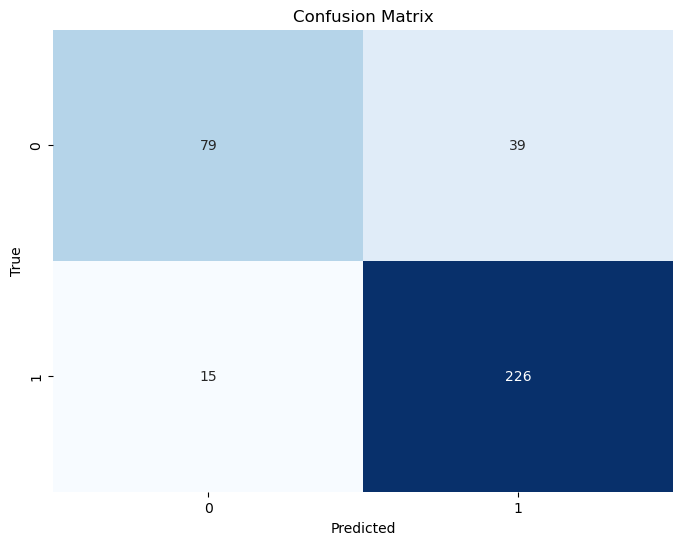

In [21]:
#i would like to implement the random forest model to my data to predict the TP53 mutation
X = data  # Use the PCA-transformed dataset
# y remains the same as it already indicates if the sample has TP53 mutation or not
y= merged_df['HugoSymbol'].apply(lambda x: 1 if x == 'TP53' else 0)  # Binary target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Feature ranking:
1. feature 2 (0.06120972847936658)
2. feature 6 (0.022643469139761296)
3. feature 25 (0.022573456276323827)
4. feature 1 (0.015794735699154898)
5. feature 55 (0.013962063523605505)
6. feature 19 (0.012812184701145512)
7. feature 20 (0.01266478822842072)
8. feature 24 (0.012412455812207245)
9. feature 45 (0.012161656007656837)
10. feature 15 (0.011969026101679383)


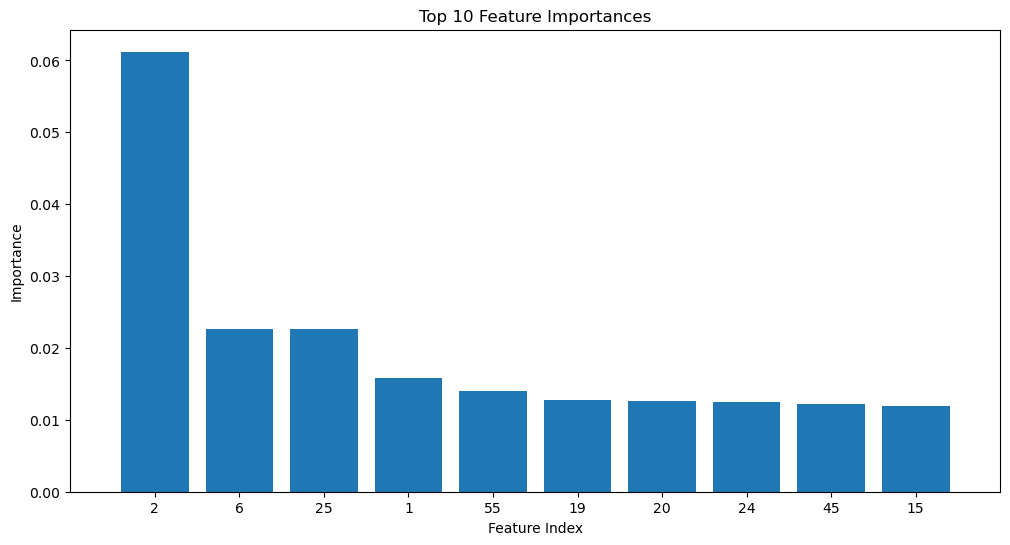

In [22]:


# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
#consider the first 10 features

print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")
# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()


              precision    recall  f1-score   support

           0       0.84      0.67      0.75       118
           1       0.85      0.94      0.89       241

    accuracy                           0.85       359
   macro avg       0.85      0.80      0.82       359
weighted avg       0.85      0.85      0.84       359



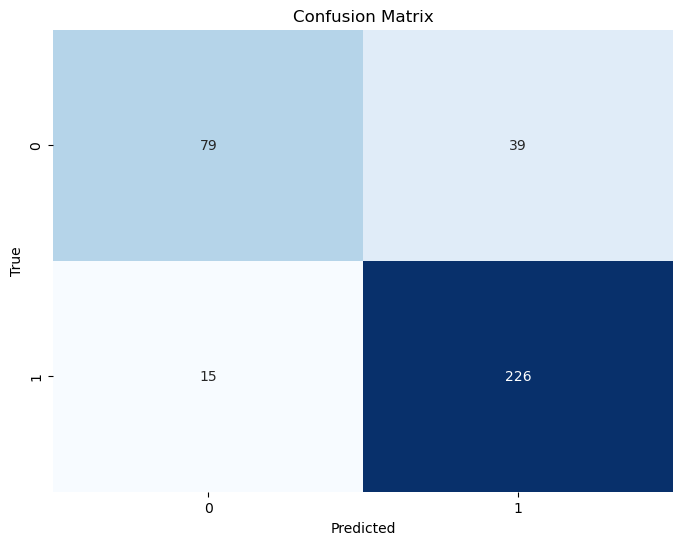

In [23]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Feature ranking:
1. feature 2 (0.06120972847936658)
2. feature 6 (0.022643469139761296)
3. feature 25 (0.022573456276323827)
4. feature 1 (0.015794735699154898)
5. feature 55 (0.013962063523605505)
6. feature 19 (0.012812184701145512)
7. feature 20 (0.01266478822842072)
8. feature 24 (0.012412455812207245)
9. feature 45 (0.012161656007656837)
10. feature 15 (0.011969026101679383)


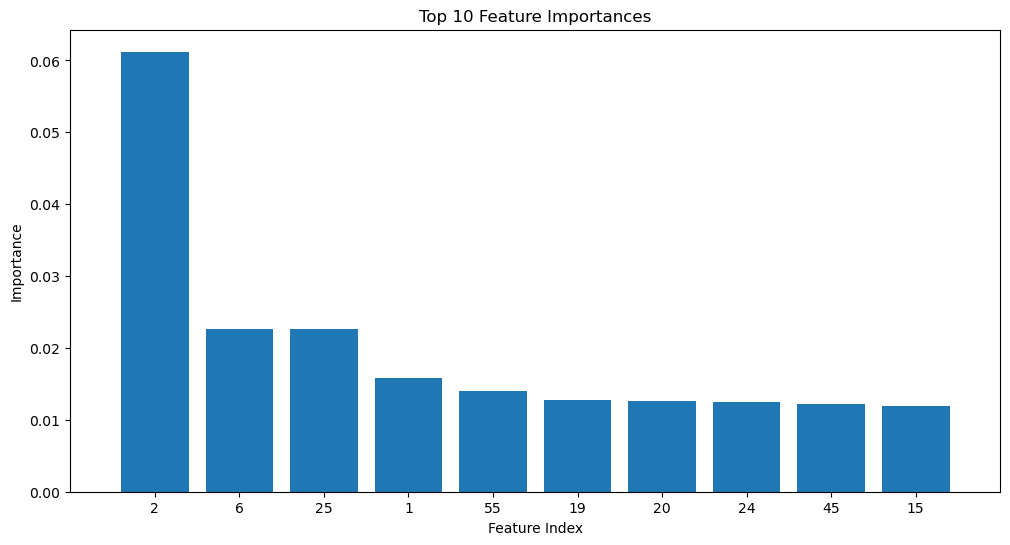

In [24]:

# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
#consider the first 10 features

print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")
# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()



In [25]:

mutations['VariantType'] = mutations['VariantType'].astype('category')
# Convert the 'VariantType' column to categorical
category_mapping = dict(enumerate(mutations['VariantType'].cat.categories))
print(category_mapping)
mutations['VariantType'] = mutations['VariantType'].cat.codes
merged_df = pd.merge(merged_df, mutations[['ModelID', 'VariantType']], on='ModelID', how='left')

{0: 'SNV', 1: 'deletion', 2: 'insertion', 3: 'substitution'}


In [ ]:
#i would now like to create a multiclass classifier that is able to predict the TP53 mutation if the cell is mutated or not
#the classes will be 5 {0: 'SNV', 1: 'deletion', 2: 'insertion', 3: 'substitution'} and class number 4 will be non mutated
merged_df['VariantType'].fillna(4, inplace=True)
#consider the initial dataset not the PCA dataset
X = merged_df.iloc[:, 1:-2]  # Features

#rerun PCA
pca = PCA(n_components=128)
scaler= StandardScaler()
X_s= scaler.fit_transform(X)
y=pca.fit_transform(X_s)
pca_data=pd.DataFrame(data=y, columns=[f'PC{i+1}' for i in range(128)])

# Use the original dataset for multiclass classification
#the labels are very unbalanced should i use a scaler?
y= merged_df['VariantType']

# Sovracampionamento con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(pca_data, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       241
         1.0       0.96      0.96      0.96       228
         2.0       0.98      1.00      0.99       252
         3.0       0.98      0.99      0.99       200
         4.0       0.87      0.87      0.87       238

    accuracy                           0.93      1159
   macro avg       0.93      0.93      0.93      1159
weighted avg       0.93      0.93      0.93      1159



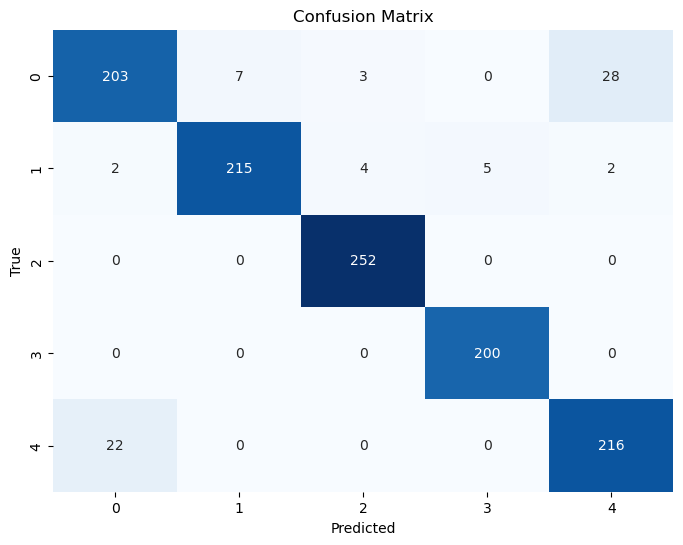

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()